Problem Statement -> Whether the person are survived or not with given some information
**
Target variable -> Survived

In [103]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split


In [104]:
mydata = pd.read_csv('titanic-training-data.csv')

In [105]:
mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
mydata.shape

(891, 12)

In [107]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [108]:
mydata.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [109]:
mydata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [110]:
mydata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Analyse the Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

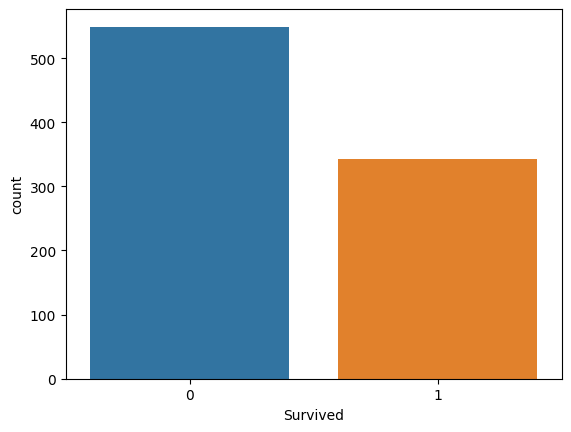

In [111]:
sns.countplot(x = "Survived",  data = mydata)

<AxesSubplot:xlabel='Survived', ylabel='count'>

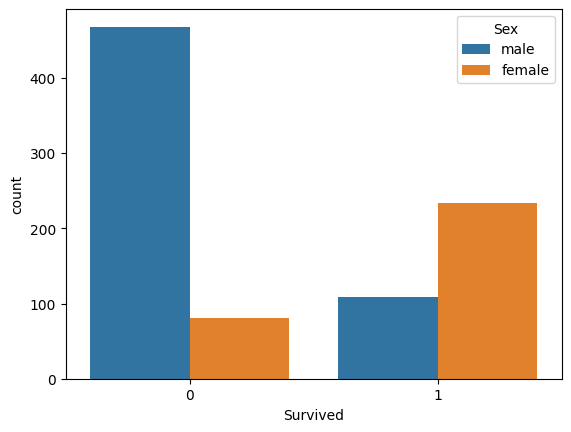

In [112]:
sns.countplot(x = "Survived", hue="Sex", data = mydata)

Data Wrangling

<AxesSubplot:>

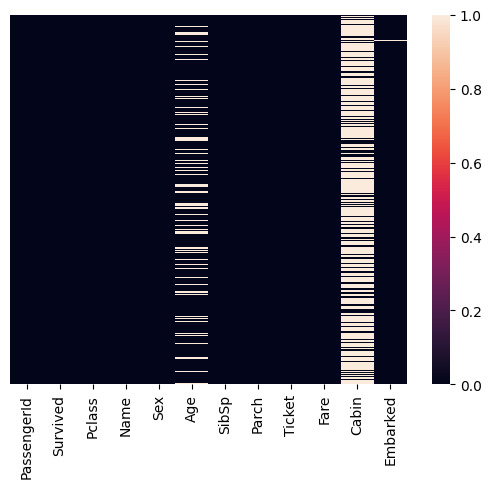

In [113]:
sns.heatmap(mydata.isnull(), yticklabels=False)

<AxesSubplot:>

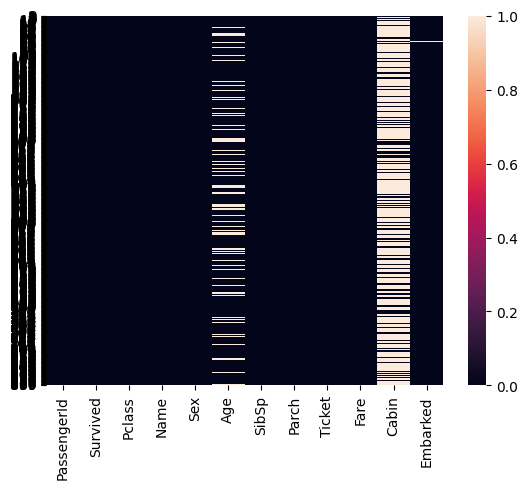

In [114]:
sns.heatmap(mydata.isnull(), yticklabels=True)

In [115]:
mydata.drop("Cabin", axis=1, inplace=True) 

In [116]:
mydata.dropna(inplace=True)

<AxesSubplot:>

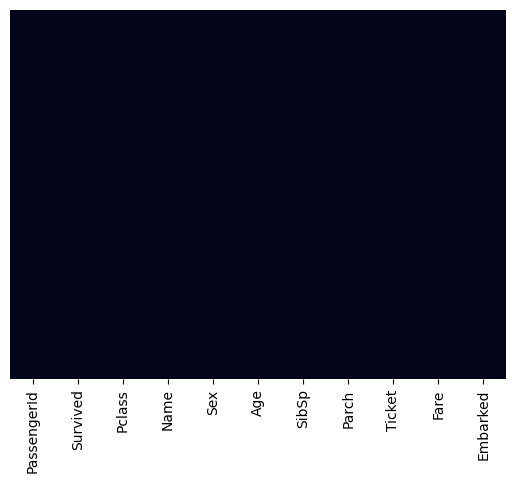

In [117]:
sns.heatmap(mydata.isnull(), yticklabels=False, cbar=False)

In [118]:
mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [119]:
mydata.shape

(712, 11)

In [120]:
Sex = pd.get_dummies(mydata["Sex"])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [121]:
Sex = pd.get_dummies(mydata["Sex"], drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [122]:
Emb = pd.get_dummies(mydata["Embarked"])
Emb.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [123]:
Emb = pd.get_dummies(mydata["Embarked"], drop_first=True)
Emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [124]:
PCla = pd.get_dummies(mydata["Pclass"])
PCla.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [125]:
PCla = pd.get_dummies(mydata["Pclass"], drop_first=True)
PCla.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [126]:
mydata = pd.concat([mydata, Sex, Emb, PCla], axis=1)
mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [127]:
mydata.drop(["Sex", "Embarked", "PassengerId", "Name", "Ticket", "Pclass"], axis = 1, inplace=True)
mydata.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


Split the Data

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [129]:
X = mydata.drop("Survived", axis=1)
y = mydata["Survived"]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

Fit Logistic Model

In [131]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
Predictions = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Predictions)

0.7710280373831776

In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Predictions)

array([[102,  24],
       [ 25,  63]])

<AxesSubplot:>

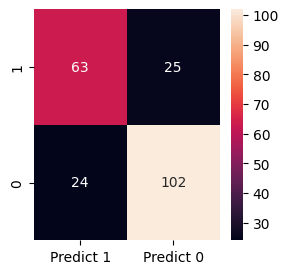

In [137]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, Predictions, labels=[1,0])

mydata_cm = pd.DataFrame(cm, index = [i for i in ["1", "0"]], columns= [i for i in ["Predict 1", "Predict 0"]])

plt.figure(figsize=(3,3))
sns.heatmap(mydata_cm, annot=True, fmt='g')